In [5]:
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np

y=pd.read_csv(r'Trainings\Netflix_Regression.csv')

Data Cleanup & Investigation

In [6]:
y = y.loc[~(y['Gender'].isna())]
y['User ID'] = y['User ID'].astype('string')
y['Date'] = pd.to_datetime(y['Date'], infer_datetime_format=True)
y['Day'] = y['Day'].astype('string')
y['Show'] = y['Show'].astype('string')
y = pd.get_dummies(y, columns=['Gender'], drop_first=False, dummy_na=False)
y

User ID       Date       Day                   Show  Season  Episode  \
0     117752 2019-02-12   Tuesday        Stranger Things       2        6   
1      28615 2019-02-12   Tuesday        Stranger Things       2        6   
2      72226 2019-02-12   Tuesday        Stranger Things       2        3   
3      62565 2019-02-09  Saturday        Stranger Things       2       10   
4       3494 2019-02-12   Tuesday        Stranger Things       2        1   
...      ...        ...       ...                    ...     ...      ...   
2999   24988 2019-02-11    Monday  American Horror Story       4        2   
3000   15248 2019-02-11    Monday  American Horror Story       4        2   
3001    4959 2019-02-09  Saturday  American Horror Story       2        1   
3002   28654 2019-02-10    Sunday  American Horror Story       5        2   
3003  112557 2019-02-10    Sunday  American Horror Story       4        2   

      Time Watched  Completed  Time of Day  Gender_Female  Gender_Male  
0               51          1            1              1            0  
1                2          0            0              1            0  
2                5          0            1              1            0  
3               59          1            1              1            0  
4               33          1            0              1            0  
...            ...        ...          ...            ...          ...  
2999            25          0            1              1            0  
3000            16          0            0              0            1  
3001            20          0            1              0            1  
3002            12          0            1              0            1  
3003            19          0            1              0            1  

[2905 rows x 11 columns]

Model Preprocessing

In [8]:
from sklearn.model_selection import train_test_split


y
#Split
#x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.20)
x = y[['Season', 'Episode', 'Time Watched', 'Time of Day', 'Gender_Female', 'Gender_Male']]
Y = y[['Completed']]

x_train, x_test, z_train, z_test = train_test_split(x, Y, test_size=0.20)

Model

In [11]:
import statsmodels.api as sm

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.293560
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Completed   No. Observations:                 2324
Model:                          Logit   Df Residuals:                     2318
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Jan 2022   Pseudo R-squ.:                  0.4839
Time:                        19:27:04   Log-Likelihood:                -682.23
converged:                       True   LL-Null:                       -1322.0
Covariance Type:            nonrobust   LLR p-value:                1.695e-274
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9265   7.17e+06  -4.08e-07      1.000   -1.41e+07    1.41e+07
Season           -0.

Look At Results

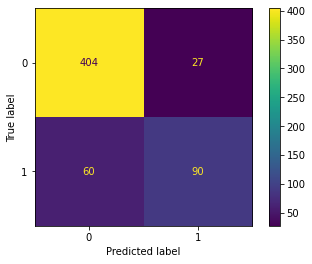

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,z_train)

#view results
model.fit(x_train, z_train)
plot_confusion_matrix(logistic_regression, x_test, z_test)  
plt.show()
